In [59]:
 !pip install census
 !pip install pypandoc
 !pip install us
 # Include this line to make plots interactive
 %matplotlib notebook


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [60]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import Census
from us import states





dfmain=pd.read_csv("FactData_Jun2018.txt")
dfloc=pd.read_csv("DTloc.txt")



#read in data sets

DFstat = pd.read_csv("DTwkstat.txt")
DFagy = pd.read_csv("DTagy.txt")
DFdate = pd.read_csv("DTdate.txt")
DFedlvl = pd.read_csv("DTedlvl.txt")
DFgse = pd.read_csv("DTgsegrd.txt")
DFlos = pd.read_csv("DTloslvl.txt")
DFocc = pd.read_csv("DTocc.txt")
DFpatco = pd.read_csv("DTpatco.txt")
DFppgrd = pd.read_csv("DTppgrd.txt")
DFsal = pd.read_csv("DTsallvl.txt")
DFstem = pd.read_csv("DTstemocc.txt")
DFsuper = pd.read_csv("DTsuper.txt")
DFtoa = pd.read_csv("DTtoa.txt")
DFwrksch = pd.read_csv("DTwrksch.txt")


dfmain.head()
#dfloc.head()


C:\Users\doyle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3,4,6,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,D,15,13,D,0905,1,GS-13,J,XXXX,8,30,F,1,201806,1,106668.0,5.8
1,AA00,11,G,15,NaN,D,0301,2,ES-**,Q,XXXX,8,50,F,1,201806,1,174500.0,8.7
2,AA00,11,D,15,14,C,0905,1,GS-14,Z,XXXX,8,30,F,1,201806,1,NaN,3.8
3,AA00,11,H,15,NaN,H,0905,1,ES-**,Q,XXXX,8,50,F,1,201806,1,174500.0,25.4
4,AA00,11,E,15,14,C,0905,1,GS-14,Z,XXXX,8,30,F,1,201806,1,NaN,3.0


In [73]:
#Merge data sets
DFCombo = pd.merge(dfloc, dfmain, on='LOC')
DFCombo = pd.merge(DFCombo, DFstat, on = 'WORKSTAT')
DFCombo = pd.merge(DFCombo, DFagy, on ='AGYSUB')
DFCombo = pd.merge(DFCombo, DFdate, on = 'DATECODE')
DFCombo = pd.merge(DFCombo, DFedlvl, on = 'EDLVL')
DFCombo = pd.merge(DFCombo, DFgse, on = 'GSEGRD')
DFCombo = pd.merge(DFCombo, DFlos, on = 'LOSLVL')
DFCombo = pd.merge(DFCombo, DFocc, on = 'OCC')
DFCombo = pd.merge(DFCombo,DFpatco, on = 'PATCO')
DFCombo = pd.merge(DFCombo, DFppgrd, on = 'PPGRD')
DFCombo = pd.merge(DFCombo, DFsal, on = 'SALLVL')
DFCombo = pd.merge(DFCombo, DFstem, on = 'STEMOCC')
DFCombo = pd.merge(DFCombo, DFsuper, on = 'SUPERVIS')
#DFCombo = pd.merge(DFCombo, DFtoa, on = 'TOA')
DFCombo = pd.merge(DFCombo, DFwrksch, on = 'WORKSCH')
DFCombo.head()


,LOCTYP,LOCTYPT,LOC,LOCT,AGYSUB,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,...,STEMAGGT,STEMTYP,STEMTYPT,STEMOCCT,SUPERTYP,SUPERTYPT,SUPERVIST,WSTYP,WSTYPT,WORKSCHT
0,1,United States,20,20-KANSAS,AFNG,E,NaN,10,B,2185,...,ALL OTHER OCCUPATIONS,6,ALL OTHER OCCUPATIONS,XXXX-ALL OTHER OCCUPATIONS,3,Non-Supervisor,8-ALL OTHER POSITIONS,1,Full-time,F - Full-time Nonseasonal
1,1,United States,20,20-KANSAS,AFNG,D,13,10,B,2185,...,ALL OTHER OCCUPATIONS,6,ALL OTHER OCCUPATIONS,XXXX-ALL OTHER OCCUPATIONS,3,Non-Supervisor,8-ALL OTHER POSITIONS,1,Full-time,F - Full-time Nonseasonal
2,1,United States,28,28-MISSISSIPPI,AFNG,C,13,10,B,2185,...,ALL OTHER OCCUPATIONS,6,ALL OTHER OCCUPATIONS,XXXX-ALL OTHER OCCUPATIONS,3,Non-Supervisor,8-ALL OTHER POSITIONS,1,Full-time,F - Full-time Nonseasonal
3,1,United States,39,39-OHIO,AFNG,C,04,10,B,2185,...,ALL OTHER OCCUPATIONS,6,ALL OTHER OCCUPATIONS,XXXX-ALL OTHER OCCUPATIONS,3,Non-Supervisor,8-ALL OTHER POSITIONS,1,Full-time,F - Full-time Nonseasonal
4,1,United States,39,39-OHIO,AFNG,D,04,10,B,2185,...,ALL OTHER OCCUPATIONS,6,ALL OTHER OCCUPATIONS,XXXX-ALL OTHER OCCUPATIONS,3,Non-Supervisor,8-ALL OTHER POSITIONS,1,Full-time,F - Full-time Nonseasonal


In [74]:
# find listing of govt employees by state
# Grab the data contained within the "Berry" row and the "Phone Number" column

locations=DFCombo["LOCT"]

#locations.str.split("-")

locations.str.split("-").str.get(1).str.title().value_counts()




    


Suppressed (See Data Definitions)    13917
California                           13284
District Of Columbia                  7288
Washington                            6311
Texas                                 5089
Virginia                              4763
Oregon                                4710
Florida                               3640
Montana                               3363
Idaho                                 3345
Colorado                              3050
Georgia                               3005
New Mexico                            2935
Pennsylvania                          2733
Arizona                               2700
Hawaii                                2597
Maryland                              2417
Missouri                              2391
Illinois                              2110
New York                              2011
Utah                                  1867
Ohio                                  1844
Tennessee                             1799
Wisconsin  

In [75]:
#list most to least affected states



My_state_list=[]                          

# Set new index to last_name

State_WA = DFCombo["LOCT"]="Washigton" 
State_DC = DFCombo["LOCT"]="District Of Columbia" 
State_CA = DFCombo["LOCT"]="California" 
State_DE = DFCombo["LOCT"]="Delware" 
State_WY = DFCombo["LOCT"]="Wyoming" 
State_MO = DFCombo["LOCT"]="Minnesota"

My_state_list.append(State_WA)
My_state_list.append(State_DC)
My_state_list.append(State_CA)
My_state_list.append(State_DE)
My_state_list.append(State_MO)
My_state_list.append(State_WY)


print(My_state_list)

['Washigton', 'District Of Columbia', 'California', 'Delware', 'Minnesota', 'Wyoming']


In [76]:

#read csv 

Govt_shutdown_csv = "Govt_shutdown.csv"

#read the csv into a pandas DataFrame
Govt_shutdown_df = pd.read_csv(Govt_shutdown_csv)

# Print the first five rows of data to the screen

Govt_shutdown_df.head(7)



,States Affected by the Government Shutdown,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Most Affect,Total,Least Affect,Total
1,California,13284,Arkansas,1080
2,District of Columbia,7288,Delware,116
3,Washington,6311,Minnesota,1071
4,Texas,5089,N. Carolina,1536
5,Virginia,4710,S. Carolina,1100
6,Oregon,4710,Wyoming,1094


<IPython.core.display.Javascript object>


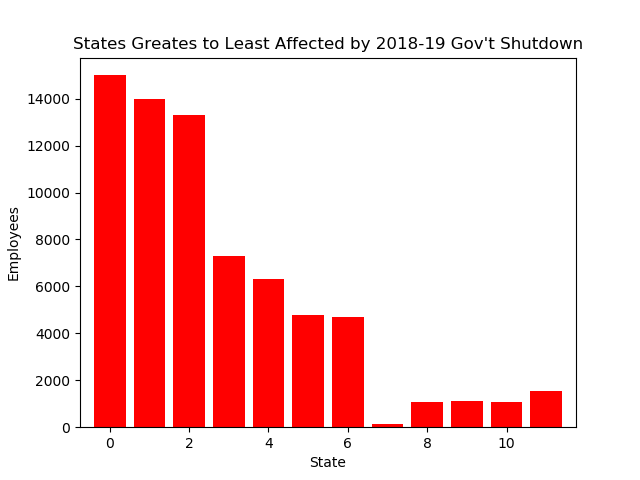

<function matplotlib.pyplot.show(*args, **kw)>

In [84]:
#create list for bar grapgh to be the index for easy row reference

Govt_shutdown_df = Govt_shutdown_csv

employees=[15000,14000,13284, 7288, 6311,4763, 4710, 116, 1094, 1100, 1071,1536]
x_axis=np.arange(len(employees))

state= ["Washington", "District Of Columbia", "California, Delware", "Minnesota", "Wyoming"]
y_axis=np.arange(len(state))


# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks

plt.bar(x_axis, employees, color = 'r')

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

#set a title and label

plt.title("States Greates to Least Affected by 2018-19 Gov't Shutdown")
plt.xlabel("State")
plt.ylabel("Employees")


#plt.plot(x_axis,e_x)

 #Tell matplotlib where we would like to place each of our x axis headers
#tick_locations = [value for value in x_axis]
#plt.xticks(x_axis,["Washington", "District Of Columbia", "California, Delware", "Minnesota", "Wyoming"])

plt.show